In [ ]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="CaBW79iws5NrDBnlvWvI")
project = rf.workspace("dark-ekqd9").project("my-first-project-quqhf")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-1 in yolov11:: 100%|██████████| 3404/3404 [00:01<00:00, 3107.38it/s]


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import torch
print(f"GPU memory allocated: {torch.cuda.memory_allocated()/1024**3:.2f} GB")
print(f"GPU memory reserved: {torch.cuda.memory_reserved()/1024**3:.2f} GB")
print(f"GPU memory free: {(torch.cuda.get_device_properties(0).total_memory - torch.cuda.memory_allocated())/1024**3:.2f} GB")

GPU memory allocated: 0.00 GB
GPU memory reserved: 0.00 GB
GPU memory free: 14.74 GB


In [ ]:
import torch
import os
from ultralytics import YOLO

# Clear GPU memory
torch.cuda.empty_cache()

# Set memory management
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

# Load model
model = YOLO("/content/yolov9c.pt")

# Train with memory-optimized settings
results = model.train(
    data="My-First-Project-1/data.yaml",
    epochs=20,
    imgsz=640,     # Reduced image size
    batch=4,       # Keep batch size at 1
    amp=True,      # Mixed precision training
    cache=False,   # Don't cache images in memory
    device=0       # Specify GPU device
)

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=My-First-Project-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/yolov9c.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

100%|██████████| 755k/755k [00:00<00:00, 24.4MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

 12                  -1  1   3119616  ultralytics.nn.modules.block.RepNCSPELAN4    [1024, 512, 512, 256, 1]      
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    912640  ultralytics.nn.modules.block.RepNCSPELAN4    [1024, 256, 256, 128, 1]      
 16                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1   2988544  ultralytics.nn.modules.block.RepNCSPELAN4    [768, 512, 512, 256, 1]       
 19                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1261.4±569.7 MB/s, size: 43.0 KB)


train: Scanning /content/My-First-Project-1/train/labels... 1188 images, 8 backgrounds, 0 corrupt: 100%|██████████| 1188/1188 [00:00<00:00, 2460.24it/s]

train: New cache created: /content/My-First-Project-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 526.0±390.7 MB/s, size: 45.0 KB)


val: Scanning /content/My-First-Project-1/valid/labels... 339 images, 2 backgrounds, 0 corrupt: 100%|██████████| 339/339 [00:00<00:00, 1615.71it/s]

val: New cache created: /content/My-First-Project-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.99G      1.095      1.515      1.206          7        640: 100%|██████████| 297/297 [01:16<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:09<00:00,  4.77it/s]


                   all        339        350    0.00177      0.394    0.00116    0.00057

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.45G        1.3      1.215      1.316          4        640: 100%|██████████| 297/297 [01:10<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  5.94it/s]

                   all        339        350      0.756      0.654      0.649      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.52G      1.262      1.154       1.29          6        640: 100%|██████████| 297/297 [01:10<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  5.99it/s]

                   all        339        350      0.878      0.758      0.835       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.71G      1.203      1.041      1.251          8        640: 100%|██████████| 297/297 [01:10<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.20it/s]

                   all        339        350       0.87      0.637      0.721      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.89G      1.173     0.9798      1.237         10        640: 100%|██████████| 297/297 [01:10<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  5.95it/s]

                   all        339        350      0.891      0.837      0.901      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.96G      1.119     0.9005      1.189          6        640: 100%|██████████| 297/297 [01:11<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  6.00it/s]

                   all        339        350      0.896      0.869      0.917      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.04G      1.058     0.8453      1.178          7        640: 100%|██████████| 297/297 [01:11<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.21it/s]

                   all        339        350      0.946      0.851      0.939      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.11G      1.008     0.8146      1.148         10        640: 100%|██████████| 297/297 [01:10<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  6.10it/s]

                   all        339        350      0.901      0.861      0.921      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.34G     0.9533     0.7535      1.115          3        640: 100%|██████████| 297/297 [01:10<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  6.12it/s]

                   all        339        350      0.956      0.883      0.956      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.53G     0.9375     0.7406      1.103         10        640: 100%|██████████| 297/297 [01:10<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.27it/s]

                   all        339        350      0.933       0.92      0.956      0.757


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       4.6G     0.8595     0.6599      1.073          4        640: 100%|██████████| 297/297 [01:09<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  6.12it/s]

                   all        339        350       0.96      0.909       0.98      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.67G     0.8019     0.6147      1.057          4        640: 100%|██████████| 297/297 [01:09<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  6.00it/s]

                   all        339        350      0.956      0.862      0.952      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.91G     0.7644     0.5696      1.028          4        640: 100%|██████████| 297/297 [01:10<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.22it/s]

                   all        339        350      0.957      0.888      0.967      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.98G     0.7725     0.5504       1.03          3        640: 100%|██████████| 297/297 [01:09<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.18it/s]

                   all        339        350      0.969      0.883      0.963      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.28G      0.715       0.51      1.007          4        640: 100%|██████████| 297/297 [01:09<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.24it/s]

                   all        339        350      0.965      0.886      0.967      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.35G     0.6788     0.4875     0.9918          4        640: 100%|██████████| 297/297 [01:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  6.04it/s]

                   all        339        350      0.978      0.903      0.973      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.42G     0.6533     0.4642     0.9785          4        640: 100%|██████████| 297/297 [01:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.23it/s]

                   all        339        350      0.919      0.963      0.977       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.71G     0.6338     0.4466     0.9611          4        640: 100%|██████████| 297/297 [01:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  6.01it/s]

                   all        339        350      0.928      0.964      0.979      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.79G     0.5952     0.4179     0.9459          4        640: 100%|██████████| 297/297 [01:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07<00:00,  6.06it/s]

                   all        339        350      0.918      0.963      0.979      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.87G     0.5707     0.4019     0.9485          4        640: 100%|██████████| 297/297 [01:09<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.24it/s]

                   all        339        350      0.923      0.966      0.982      0.863



20 epochs completed in 0.457 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c summary (fused): 156 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.44it/s]


                   all        339        350      0.923      0.966      0.982      0.863
Speed: 0.3ms preprocess, 14.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


In [ ]:
import os
HOME = os.getcwd()

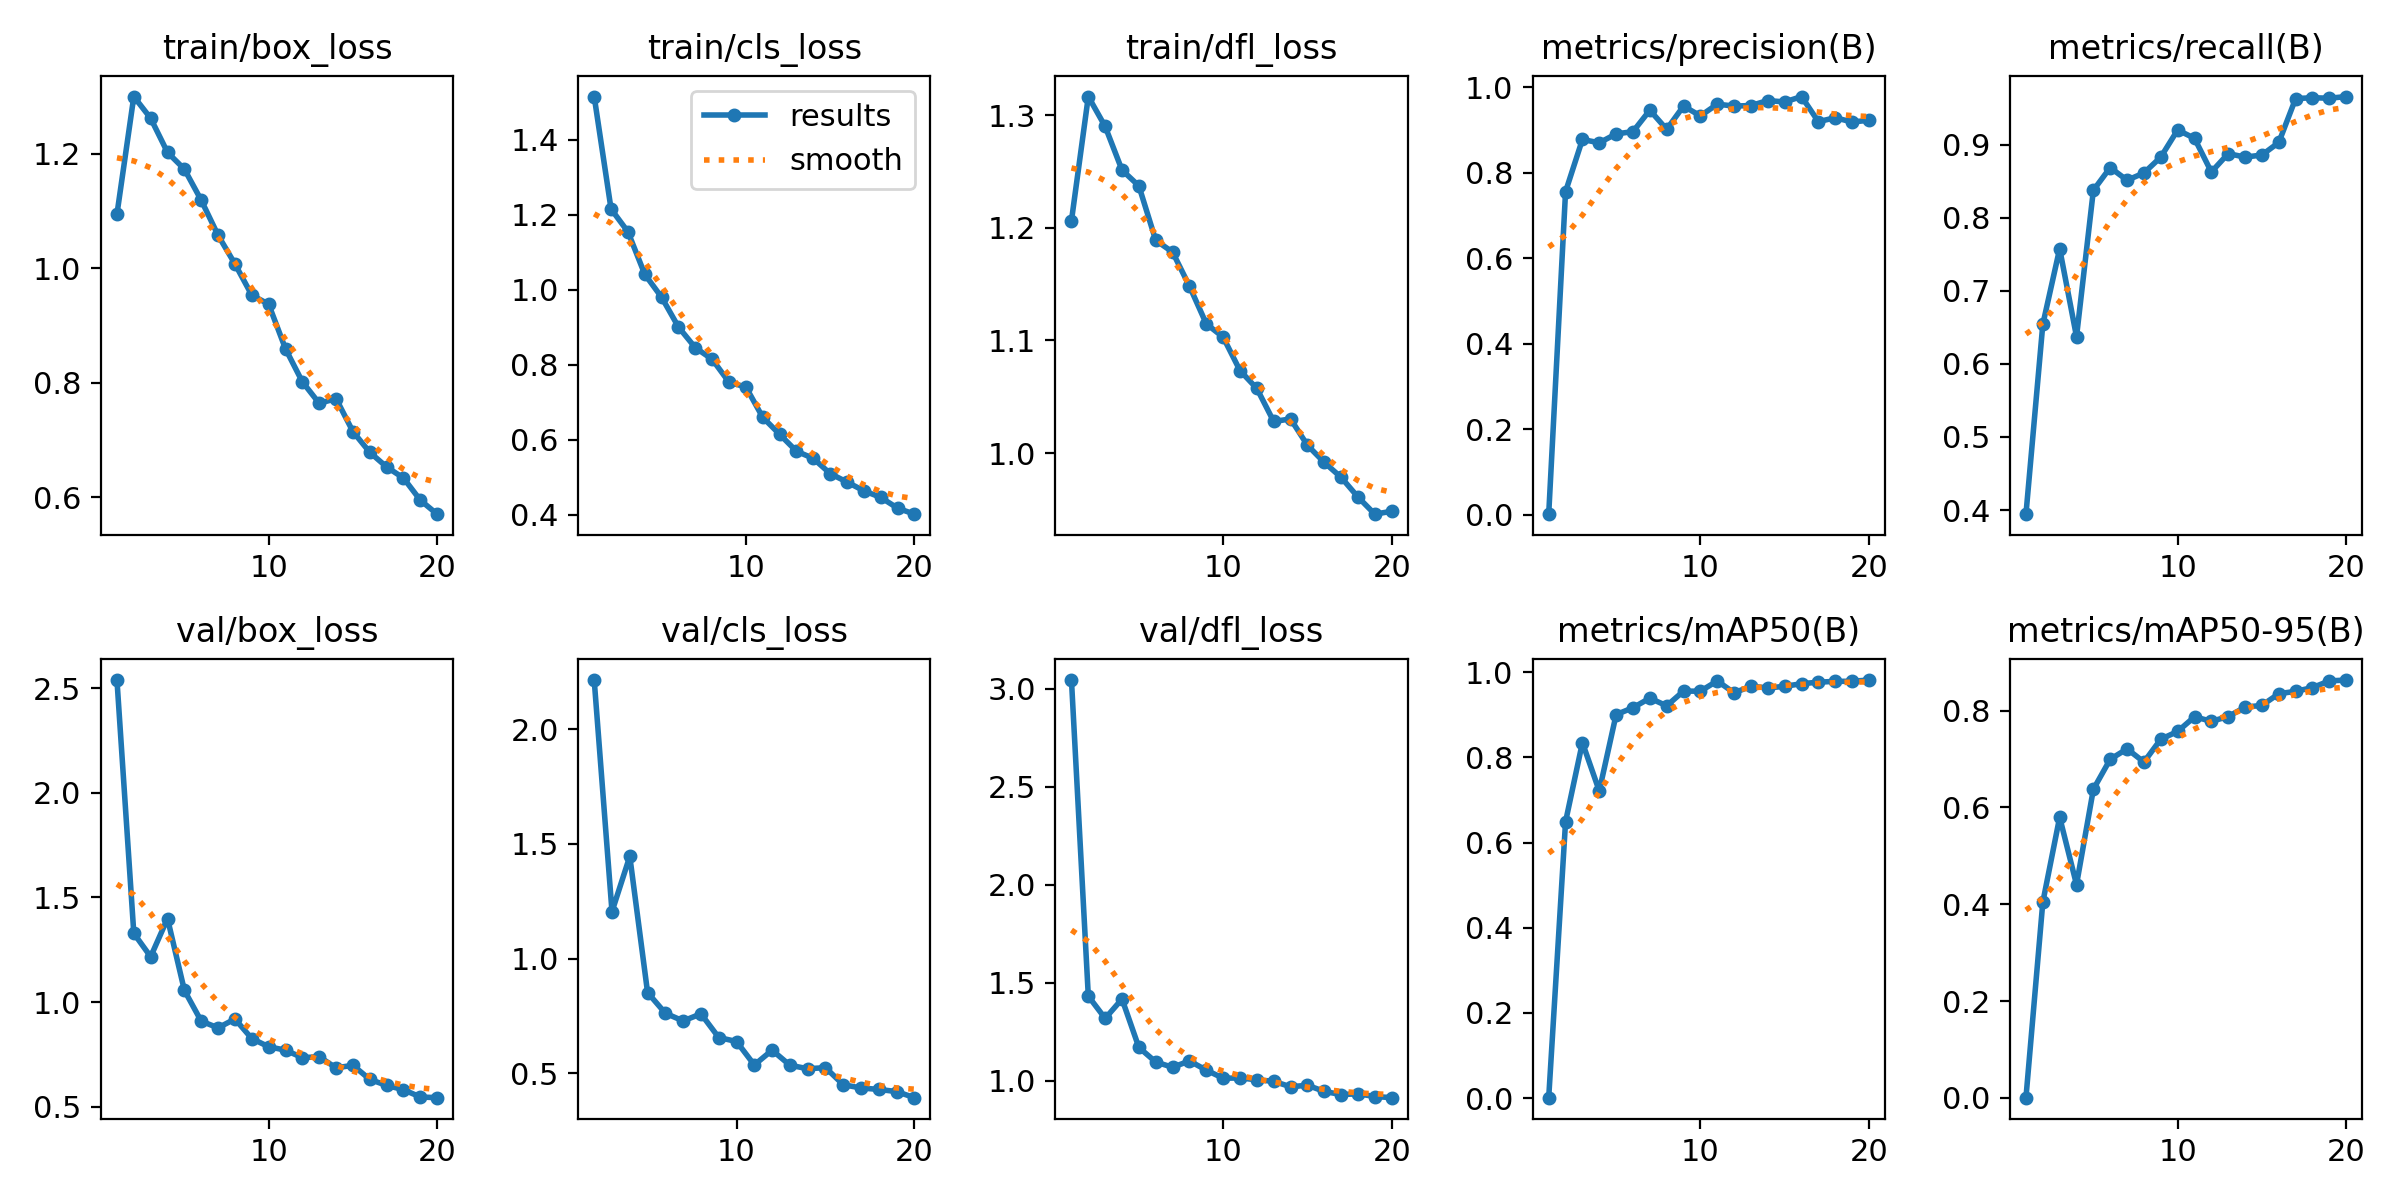

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/detect/train/results.png", width=1000)

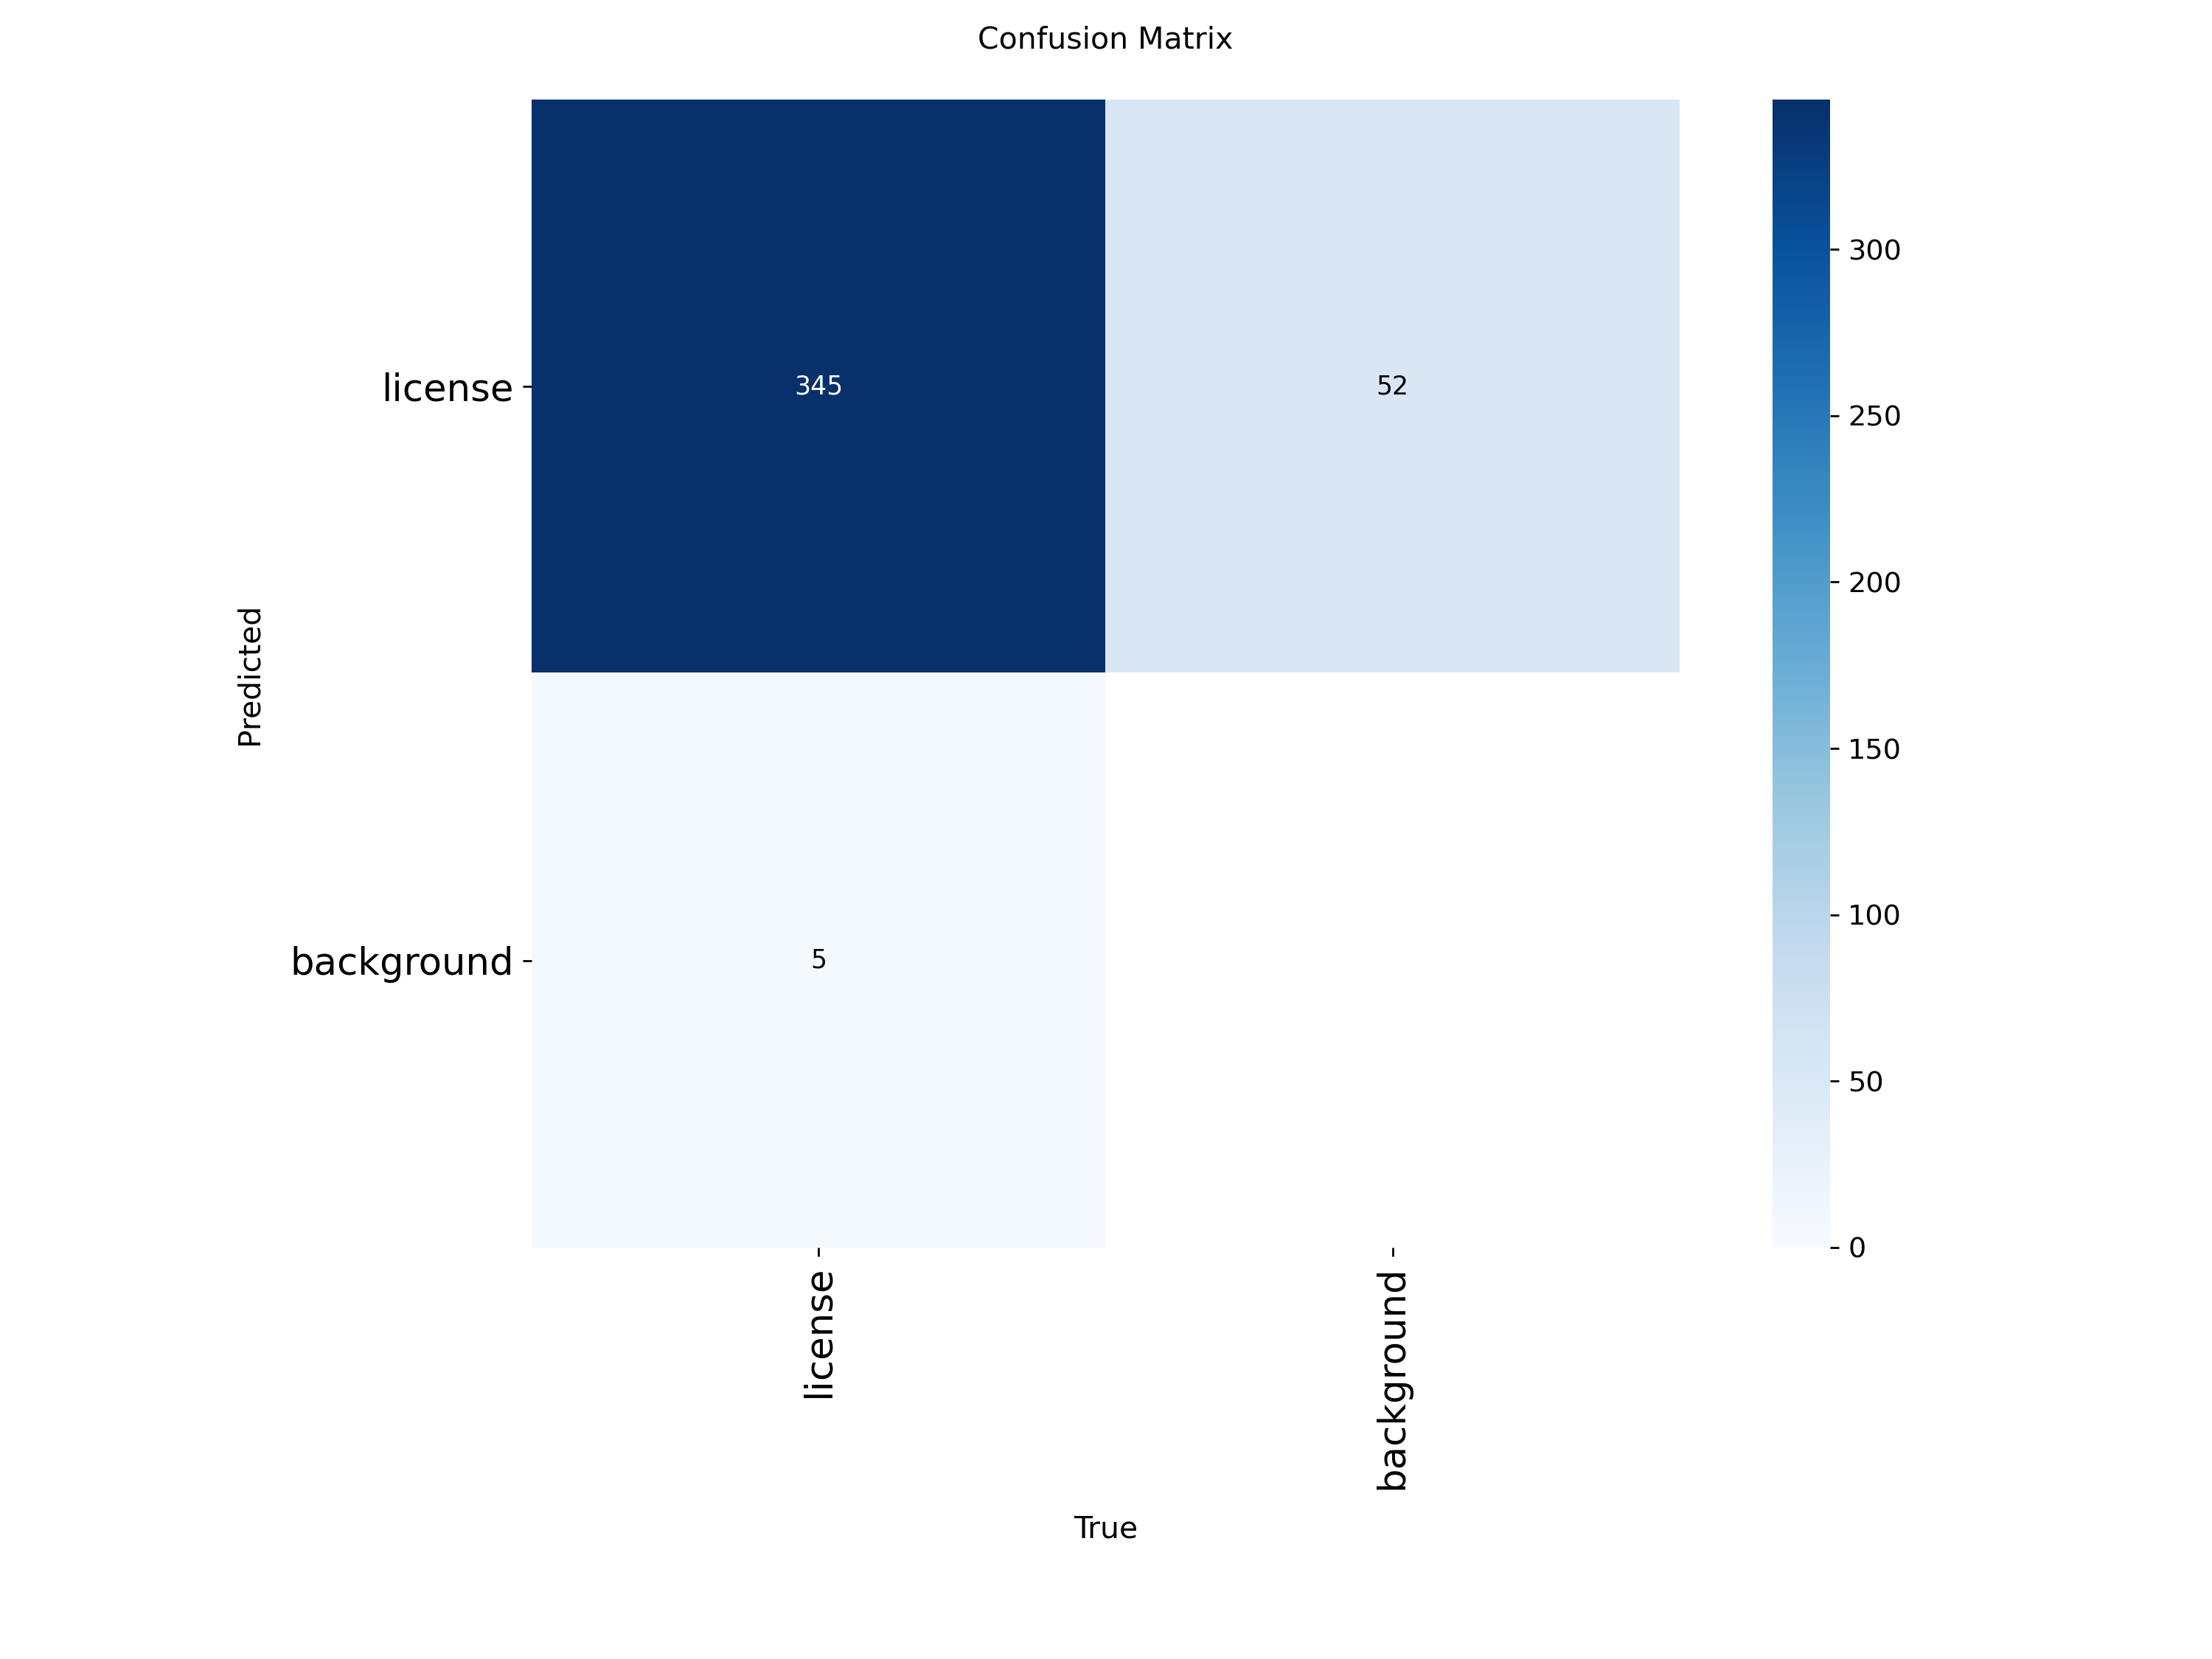

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/detect/train/confusion_matrix.png", width=1000)

In [ ]:
model.val(data="/content/My-First-Project-1/data.yaml")

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9c summary (fused): 156 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1231.8±495.4 MB/s, size: 57.7 KB)


val: Scanning /content/My-First-Project-1/valid/labels.cache... 339 images, 2 backgrounds, 0 corrupt: 100%|██████████| 339/339 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:13<00:00,  6.19it/s]


                   all        339        350      0.923      0.966      0.982      0.863
Speed: 0.6ms preprocess, 35.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78326fa45f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:

model = YOLO("/content/runs/detect/train/weights/best.pt")
results = model.predict(source="/content/My-First-Project-1/test/images", save=True, conf=0.3)


image 1/169 /content/My-First-Project-1/test/images/07aaab79-71ee-4ea3-a9e6-640191183947___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_1208484d1392541449-nissan-terrano-official-review-img_20140215_181708_jpg.rf.d0ed3f714bee6d476474b6e6aa1a0ea4.jpg: 640x640 1 license, 48.8ms
image 2/169 /content/My-First-Project-1/test/images/20dd73fd-9e05-4bdc-b380-d8148b194ae7___Maruti-Swift-Number-Plates-Design_jpg_jpeg.rf.e61df96bfd039ac483dda883a7bfe8e1.jpg: 640x640 1 license, 48.8ms
image 3/169 /content/My-First-Project-1/test/images/2302b12c-3d74-4d6c-b376-ba8ab308a8c3___big_215451_1320738450_jpg_jpeg.rf.328d03545754f7008f49f89ea4380fb1.jpg: 640x640 1 license, 31.3ms
image 4/169 /content/My-First-Project-1/test/images/347c849b-6cfa-4edb-af1f-b29bdad25c4d___new_New-Volkswagen-Polo_jpg_jpeg.rf.a76d909533698eeb2853530a718593e1.jpg: 640x640 1 license, 31.4ms
image 5/169 /content/My-First-Project-1/test/images/4ed4509a-18ed-44cd-bfe3-b1cce982e365___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-3_jpg.

In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'license'}
 obb: None
 orig_img: array([[[239, 239, 239],
         [239, 239, 239],
         [239, 239, 239],
         ...,
         [  9,   9,   9],
         [  9,   9,   9],
         [  9,   9,   9]],
 
        [[239, 239, 239],
         [239, 239, 239],
         [239, 239, 239],
         ...,
         [  9,   9,   9],
         [  9,   9,   9],
         [  9,   9,   9]],
 
        [[239, 239, 239],
         [239, 239, 239],
         [239, 239, 239],
         ...,
         [  9,   9,   9],
         [  9,   9,   9],
         [  9,   9,   9]],
 
        ...,
 
        [[ 92,  92,  92],
         [104, 104, 104],
         [111, 111, 111],
         ...,
         [ 46,  46,  46],
         [ 46,  46,  46],
         [ 47,  47,  47]],
 
        [[ 92,  92,  92],
         [113, 113, 113],
         [107, 107, 107],
         ...,
         [ 47,  4